# **Convolution Neural Network(CNN)**

1.  Known as **Convnet** \\
2.  Speicial kind of Neural Network \\
3.  Process Grid Like Topology like Time Series (1D) \\
4.  Process Images (2D)
5.  Developed by taking inspiration of human mind (Visual Cortex)


# Difference Between ANN and CNN

1.  CNN use Dot Product for multiplication
2.  ANN use Simple Tradition Matrix Multiplication
3.  CNN use Convolution operation denoted by ⨂
4.  CNN is faster then ANN


# Layers in CNN

There are 4 types of layers

1. Input layer
2. Convolution layer
3. Pooling Layer
4. Fully Connected Layer


# History of CNN

1. In 1998 Yann Lecun develop first CNN in AT&T Lab
   - This CNN recognize Bank Cheques by Scaning
2. Microsoft made OCR reading and Hand Writting recognizer
3. In this time CNN used in everywhere Face Recognization,Self Driving car


# Why Not Use ANN

1. High Computational Cost
   - As size of image increases Weight of layer increases, so a lot of computing time and power required for training model
2. Overfitting
   - As there a lot of pixel in any layer and this observe every minor pattern, so overfitting occurs
3. Loss of important information like spatial arrangment of pixels
   - Due to converting image in 1D the distance between point does not remain same so important info loss occurs


# CNN Intution

1. It works as human mind works
2. Firstly it break down image to get premitive features(edges)
3. Then it joins these simple features to make complex feature layer by layer


# How CNN Works

1. We apply filter/convolutional layer (a feature extraction technique based on mathematical functions)
2. This filter moves on image, recongize the premitive features, if found then these features are activated.
3. Activated features pass to next filter and to make complex but meaningful features
4. This process is repeated to get final result


# Application of CNN

1. Image Classification
2. Image localization (A particular object finding)
3. Object Detection
4. Face Recognization
5. Image Segmentation (Dividing image in regions)
6. Super resolution (Make low resolution high)
7. Transformation of Black & White image to Color Image
8. Pose Estimation (Current Posture of body detetction)


# Images

1. Images are 2D arrays
2. In these arrays there are pixels stored
3. It may be of 1 Channel (Greyscale) or 3 Channel(Color)
4. Color range is between 0 to 255 (0:Black,255:White)
5. In normalzation (0:Black,1:White)


# Edge Detection

1. Edge are basically change in intensity.(Change in color)
2. We apply filter to image to detect edge.
3. Edge may be horizontal, vertical, diagonal and off diagonal \\
   Horizontal Edge detector $=$
   $\begin{bmatrix}
+1 & +2 & +1 \\
0 & 0 & 0 \\
-1 & -2 & -1 \\
\end{bmatrix}$ and
   Vertical Edge detector $=$
   $\begin{bmatrix}
+1 & 0 & -1 \\
+2 & 0 & -2 \\
+1 & 0 & -1 \\
\end{bmatrix}$

4. We just define kernel/filter only and all the other stuff is handled by Backpropagation
5. If image size is $n$ by $n$ and kernel size is $m$ by $m$ then feature size is given as $n-m+1$


- There are a lot of kernels out there
- The shapes of kernel can be square,rectangular i.e $3 \text{x}3$ or $2\text{x}3$ or $3\text{x}2$


## Kernels

We need to have kernels other then edge detector like

- Kernel for Depth
- Kernel for Color


# Convolution on RGB Images

1. These are 3D images of 3 Channels
2. Filter is also of 3 Channels
3. RGB image is just like a Cube
4. Convolution of 3 channels give 1 channel
5. If image size is $(n,n,c)$ and kernel size is $(m,m,c)$ then feature size is given as $(n-m+1,n-m+1)$ with single channel


# Multiple Filters

1. We use more than 1 filters in a layer
2. If image size is $(n,n,c)$ and we have 2 kernels of size $(m,m,c)$ then feature size is given as $(n-m+1,n-m+1,2)$ with single channel


# Padding

1. CNN heavily depends on Padding and Strides

## Problems

    1. In every Convolutional layer the feature map is smaller than the orignal image.
    2. Pixel presents on corners contribute once in convolution operation

# Padding

1. If image is $(n,n)$ and kernel is $(m,m)$ then feature map size is $(n-m+1),(n-m+1)$. If image is of size $(5,5)$ and kernel is of size $(3,3)$ then image map is of size $(5-3+1,5-3+1)=(4,4)$. For Padding we have $n-m+1=n$ this tell us what should be the size of your image so that after convolution we get our orignal image size $(5,5)$ (in this case). Now by putting values
   $n-3+1=5$ this gives $n=7$ and we should have $(7,7)$ image to retain actual image size. Now for this 1. We add a column of zeros on left and right of our image and 2. We add a row of zeros to the top and bottom of image.
   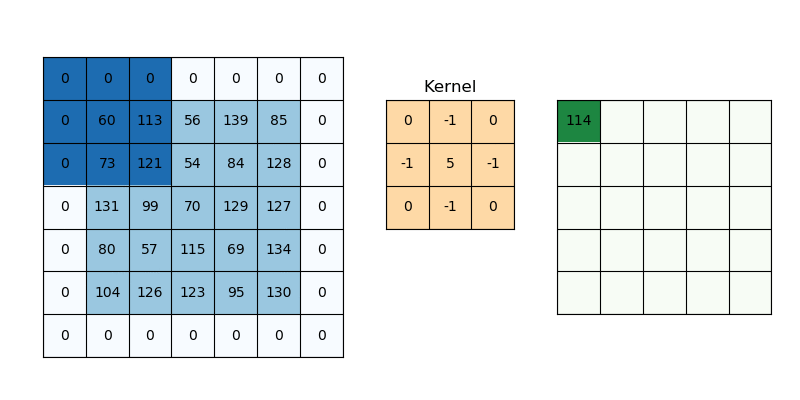 3. After applying padding we have now formula to calculate filter map size as follows
   $(n+2p-m+1)$


**Information is reduced slightly**


# Strides

1. As we know Kernel moves from left to right and then top to bottom.
2. The step size of moving forward or up to down is basically Stride.
3. It is defaut 1. Means it moves 1 unit right every time and 1 unit bottom after row.
4. In other words 1 pixel to the right and 1 pixel to the bottom $(1,1)$
5. As we increase the Strides, the filter map size decreases.
6. General formula for filter map size $(n-m+1)$ If we apply Stride the the formula becomes $\left[ \frac{n-m}{s} +1\right]$ and if we also apply padding alongwith then formula becomes $\left[ \frac{n+2p-m}{2} +1\right]$
7. In both cases size of filter map reduces. (With only applying strides or with both Strides + Padding). It means we may lose the information.
8. If Stride value is greater than 1 then this is known as **Strided Convolution**

## Special Scene

1. When Stride is 2 and image is $(6,7)$ and kernel is $(3,3)$ then in rows there is no issue but when we move top to bottom then after two steps we will not able to move further because we have not enough pixel to perform convolution. In this case our filter map size is $(2,3)$. We can calculate it by using above formula but for row and column separatley. In case of floating answer we use floar function i.e 2.1=2, 2.9=2 etc

## Why We use Strides

    1. When we only want high level features
    2. Computing power


**We lost information very quickly**


# **Pooling**

## Discussion

1. Let we have an image of size $(28,28)$ with $3$ channels and we apply $100$ filters in first layer we get $100$ filter maps and let we have **float32** data type to store the data then how much memory is occupied by this data. \\
   $$\text{Image Size}=(28,28,3)$$
   $$\text{Filter map Size}=(26,26)$$
   Now for only $1$ training set with $32$ bit float we have
   $$\text{Memory Size}=26*26*100*32=2163200 (bits)=0.2704(Mbs)$$ and this is only for 1 training set we have $100$ training sets then $0.2704*100=27.04(Mbs)$. As size of image increases the memory size also increases. This is problem with CNN. For this we must reduce the size of feature map so that our memory issue resolve
2. Second problem is Translation variance. Position of object matters in CNN. \\
   As we know that if we increase the size of strides we get smaller filter map so we can reduce memory size but strides can not handle translation variance factor. For this purpose we use **Pooling** for fixing both issues.

## Pooling

    1. Pooling is way to down sample our feature map. Because of this features become location independent/translation invariane.
    2. This is navigation process so there is no any training parameters.
    3. In Pooling we have to specify some parameters.
        1. Size: General (2,2)
        2. Stride: General (2,2)
        3. Type: General MaxPooling

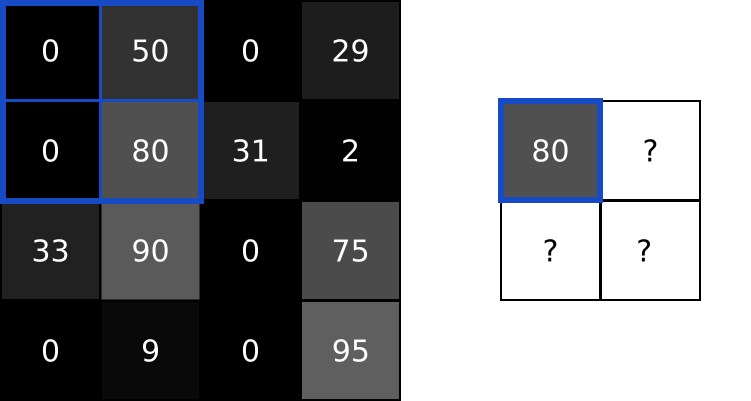


# Types of Pooling

1. MaxPooling
2. MinPooling
3. Average Pooling
4. L2 Pooling
5. Global Pooling


# Pooling on RGB Images

1. In RGB let our image is $(6,6,3)$ and filter size is $(3,3,3)$ and there are two filters applied so there are two feature maps we obtain of size $(4,4,2)$. Now we firslty apply Relu on it and then we apply pooling on each filter map separately. In this example we will get 2 features map of size $(2,2,2)$
